In [113]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image
from imblearn.over_sampling import SMOTE



In [114]:
# Non-normalised data
df_outliers = pd.read_csv('../Final_Data_Set/Original Dataset with Outliers Included.csv')
df_no_outliers = pd.read_csv('../Final_Data_Set/Original Dataset without Outliers.csv')

# Normalised data
# df_no_outliers = pd.read_excel('../Data_Set/new_df_without_outliers_copy_smote_resampled.xlsx')
# df_outliers = pd.read_excel('../Data_Set/new_df_outliers_only_copy_smote_resampled.xlsx')

In [115]:
df_no_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded,gender_encoded
0,80.0,0,1,25.19,6.6,140,0,-0.247356,-0.128959
1,54.0,0,0,27.32,6.6,80,0,-0.247356,-0.128959
2,28.0,0,0,27.32,5.7,158,0,-0.247356,0.160772
3,36.0,0,0,23.45,5.0,155,0,0.452953,-0.128959
4,76.0,1,1,20.14,4.8,155,0,0.452953,0.160772
...,...,...,...,...,...,...,...,...,...
96303,80.0,0,0,27.32,6.2,90,0,-0.247356,-0.128959
96304,2.0,0,0,17.37,6.5,100,0,-0.247356,-0.128959
96305,66.0,0,0,27.83,5.7,155,0,0.452953,0.160772
96306,24.0,0,0,35.42,4.0,100,0,-0.247356,-0.128959


In [116]:
X_no_outliers = df_no_outliers.drop('diabetes', axis=1)
y_no_outliers = df_no_outliers['diabetes']

X_outliers = df_outliers.drop('diabetes', axis=1)
y_outliers = df_outliers['diabetes']

In [117]:
X_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,1.692577,0,1,-0.321051,1.001692,0.047709,-0.640425,-0.841175
1,0.537899,0,0,-0.000114,1.001692,-1.426157,-0.640425,-0.841175
2,-0.616779,0,0,-0.000114,0.161089,0.489869,-0.640425,1.188813
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,1.561464,-0.841175
4,1.514935,1,1,-1.081957,-0.679515,0.416175,1.561464,1.188813
...,...,...,...,...,...,...,...,...
99977,1.692577,0,0,-0.000114,0.628091,-1.180513,-0.640425,-0.841175
99978,-1.771458,0,0,-1.499326,0.908292,-0.934869,-0.640425,-0.841175
99979,1.070828,0,0,0.076730,0.161089,0.416175,1.561464,1.188813
99980,-0.794422,0,0,1.220350,-1.426718,-0.934869,-0.640425,-0.841175


In [118]:
y_outliers

0        0
1        0
2        0
3        0
4        0
        ..
99977    0
99978    0
99979    0
99980    0
99981    0
Name: diabetes, Length: 99982, dtype: int64

# Decision Tree without outliers

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

## SMOTE

In [120]:
# Create copies of df
new_df_without_outliers_copy = df_no_outliers.copy()


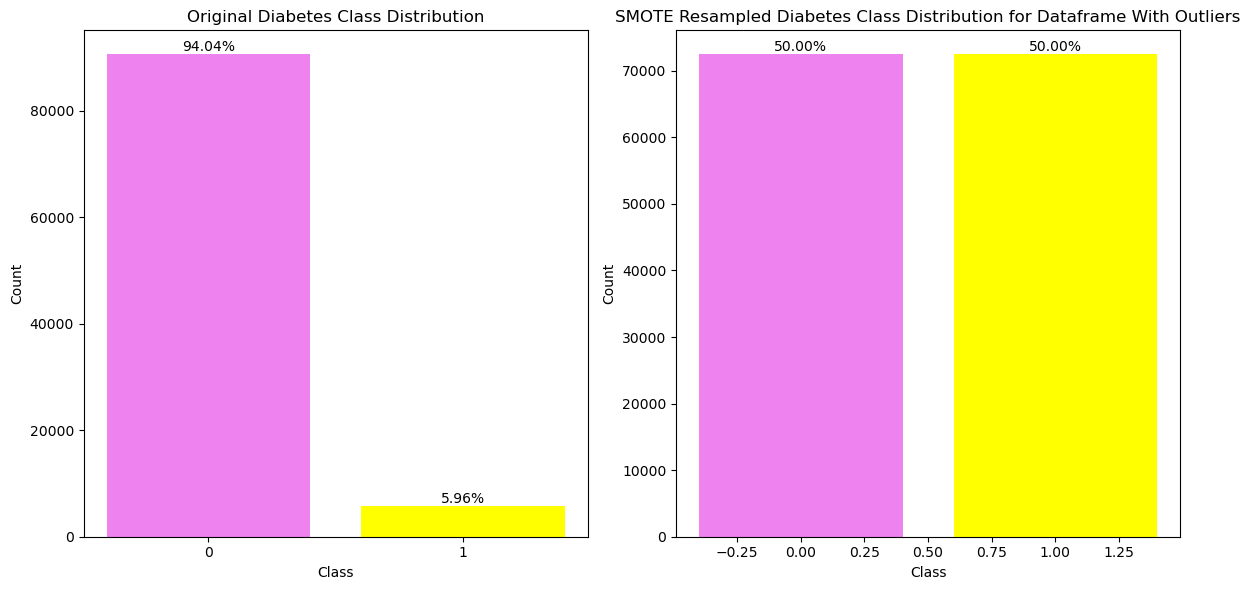

In [121]:

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count the occurrences of each class in the original dataset
original_class_counts = new_df_without_outliers_copy["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(new_df_without_outliers_copy) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_train).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_train) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe With Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [122]:
# Create a DataFrame from the SMOTE resampled data
new_df_without_outliers_copy_smote_resampled = pd.DataFrame(data=X_train, columns=X_train.columns)
new_df_without_outliers_copy_smote_resampled["diabetes"] = y_train

new_df_without_outliers_copy_smote_resampled



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,6.000000,0,0,25.590000,4.500000,90,-0.247356,0.160772,0
1,2.000000,0,0,18.840000,5.000000,158,-0.247356,-0.128959,0
2,21.000000,0,0,22.710000,6.600000,159,-0.247356,-0.128959,0
3,5.000000,0,0,27.320000,3.500000,145,-0.247356,-0.128959,0
4,7.000000,0,0,27.320000,6.200000,160,-0.247356,-0.128959,0
...,...,...,...,...,...,...,...,...,...
144895,58.000000,0,0,43.880784,6.880685,126,-0.247356,-0.128959,1
144896,51.755109,0,0,27.260620,5.773467,130,-0.247356,-0.058006,1
144897,36.367183,0,0,30.146539,7.227864,155,0.133803,-0.128959,1
144898,50.000000,0,0,24.527941,6.960666,160,0.452953,-0.012852,1


In [123]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

# train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.5416666666666666, 0.9, 'HbA1c_level <= 5.7\nentropy = 1.0\nsamples = 144900\nvalue = [72450, 72450]'),
 Text(0.25, 0.7, 'HbA1c_level <= 5.35\nentropy = 0.237\nsamples = 37429\nvalue = [35977, 1452]'),
 Text(0.16666666666666666, 0.5, 'entropy = 0.0\nsamples = 29871\nvalue = [29871, 0]'),
 Text(0.3333333333333333, 0.5, 'age <= 55.5\nentropy = 0.706\nsamples = 7558\nvalue = [6106, 1452]'),
 Text(0.16666666666666666, 0.3, 'age <= 34.5\nentropy = 0.326\nsamples = 4738\nvalue = [4456, 282]'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.033\nsamples = 2588\nvalue = [2579, 9]'),
 Text(0.25, 0.1, 'entropy = 0.549\nsamples = 2150\nvalue = [1877, 273]'),
 Text(0.5, 0.3, 'blood_glucose_level <= 113.0\nentropy = 0.979\nsamples = 2820\nvalue = [1650, 1170]'),
 Text(0.4166666666666667, 0.1, 'entropy = 0.0\nsamples = 511\nvalue = [511, 0]'),
 Text(0.5833333333333334, 0.1, 'entropy = 1.0\nsamples = 2309\nvalue = [1139, 1170]'),
 Text(0.8333333333333334, 0.7, 'HbA1c_level <= 6.6\nentropy = 0.92

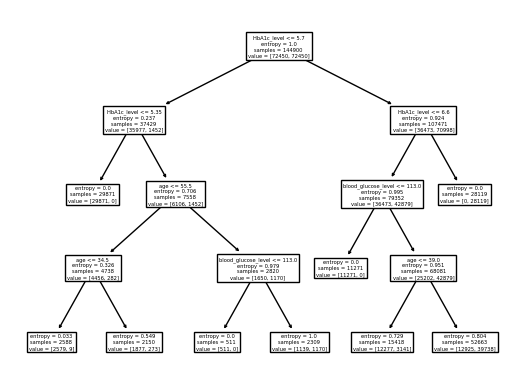

In [124]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X_no_outliers.columns.tolist())

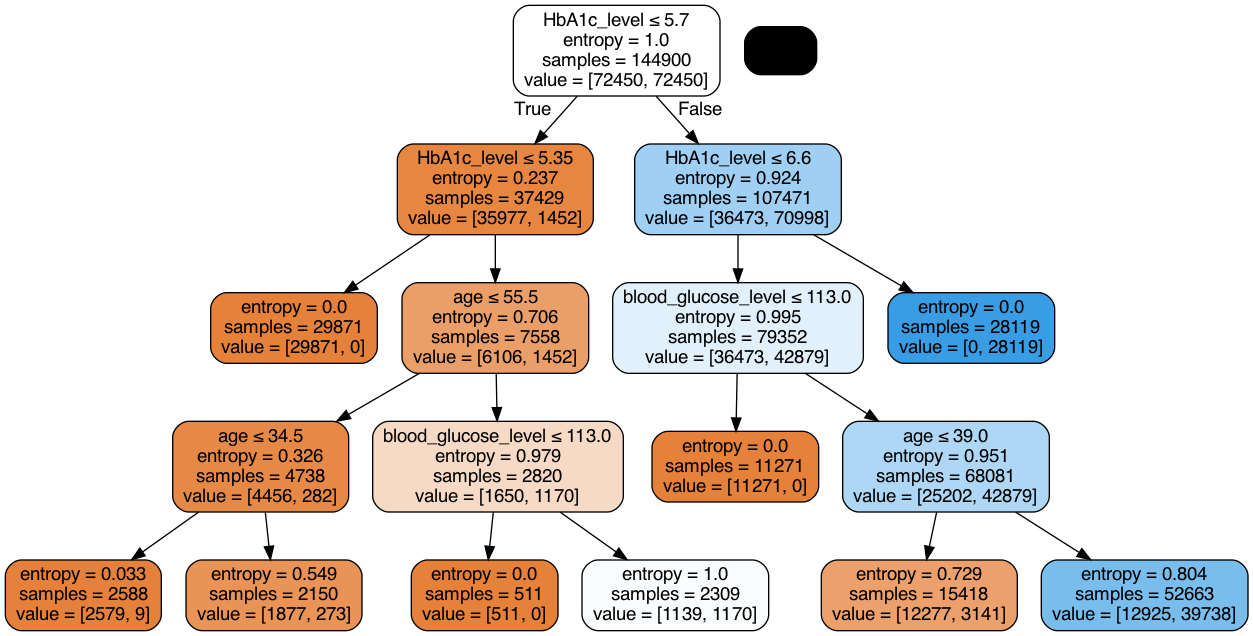

In [125]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

If an individual's HbA1c level is less than or equal to 5.35 -> low risk for diabetes.
High blood glucose levels typically lead to a higher predicted risk of diabetes.
Age can be a factor if HbA1c and blood glucose levels are borderline, being younger than 42.5 might have risk of diabetes

In [126]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
36664,0,0
46897,0,0
21917,0,0
34458,0,1
76076,0,0
10408,0,0
72944,0,0
44849,0,0
19776,1,1
4280,0,1


In [127]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[14630,    92],
       [ 3492,  1048]])

In [128]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))


Accuracy: 0.8139341709064479

Precision: 0.23083700440528634

Recall: 0.9192982456140351

F1 score: 0.36901408450704226


<h3>Hyperparameter Tuning</h3>

In [129]:
# It will take around 7 minutes to run.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [200,300,400,500,600],
    'min_samples_leaf': [3000,3500,4000,4500],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
# evaluate the model

# def function to evaluate model
def evaluate_model(model):
    predictions = model.predict(X_train)
    print("Train Accuracy :", accuracy_score(y_train,predictions))
    print('\nPrecision:',precision_score(y_train, predictions))
    print('\nRecall:',recall_score(y_train, predictions))
    print('\nF1 score:',f1_score(y_train, predictions))
    
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, predictions))
    print("-"*50)
    
    predictions = model.predict(X_test)
    print("Test Accuracy :", accuracy_score(y_test, predictions))
    print('\nPrecision:',precision_score(y_test, predictions))
    print('\nRecall:',recall_score(y_test, predictions))
    print('\nF1 score:',f1_score(y_test, predictions))
    
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))

# call function
evaluate_model(best_model)
#accuracy_score = best_model.score(X_test, y_test)
print('Best Parameters:',grid_search.best_params_,end='\n\n')
#print('accuracy:', accuracy_score)

Train Accuracy : 0.898440303657695

Precision: 0.9038359307238186

Recall: 0.89175983436853

F1 score: 0.8977572742684046
Train Confusion Matrix:
[[65576  6874]
 [ 7842 64608]]
--------------------------------------------------
Test Accuracy : 0.8939362475340048

Precision: 0.32681242807825084

Recall: 0.7473684210526316

F1 score: 0.45476381104883906
Test Confusion Matrix:
[[16367  1755]
 [  288   852]]
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3000, 'min_samples_split': 200}



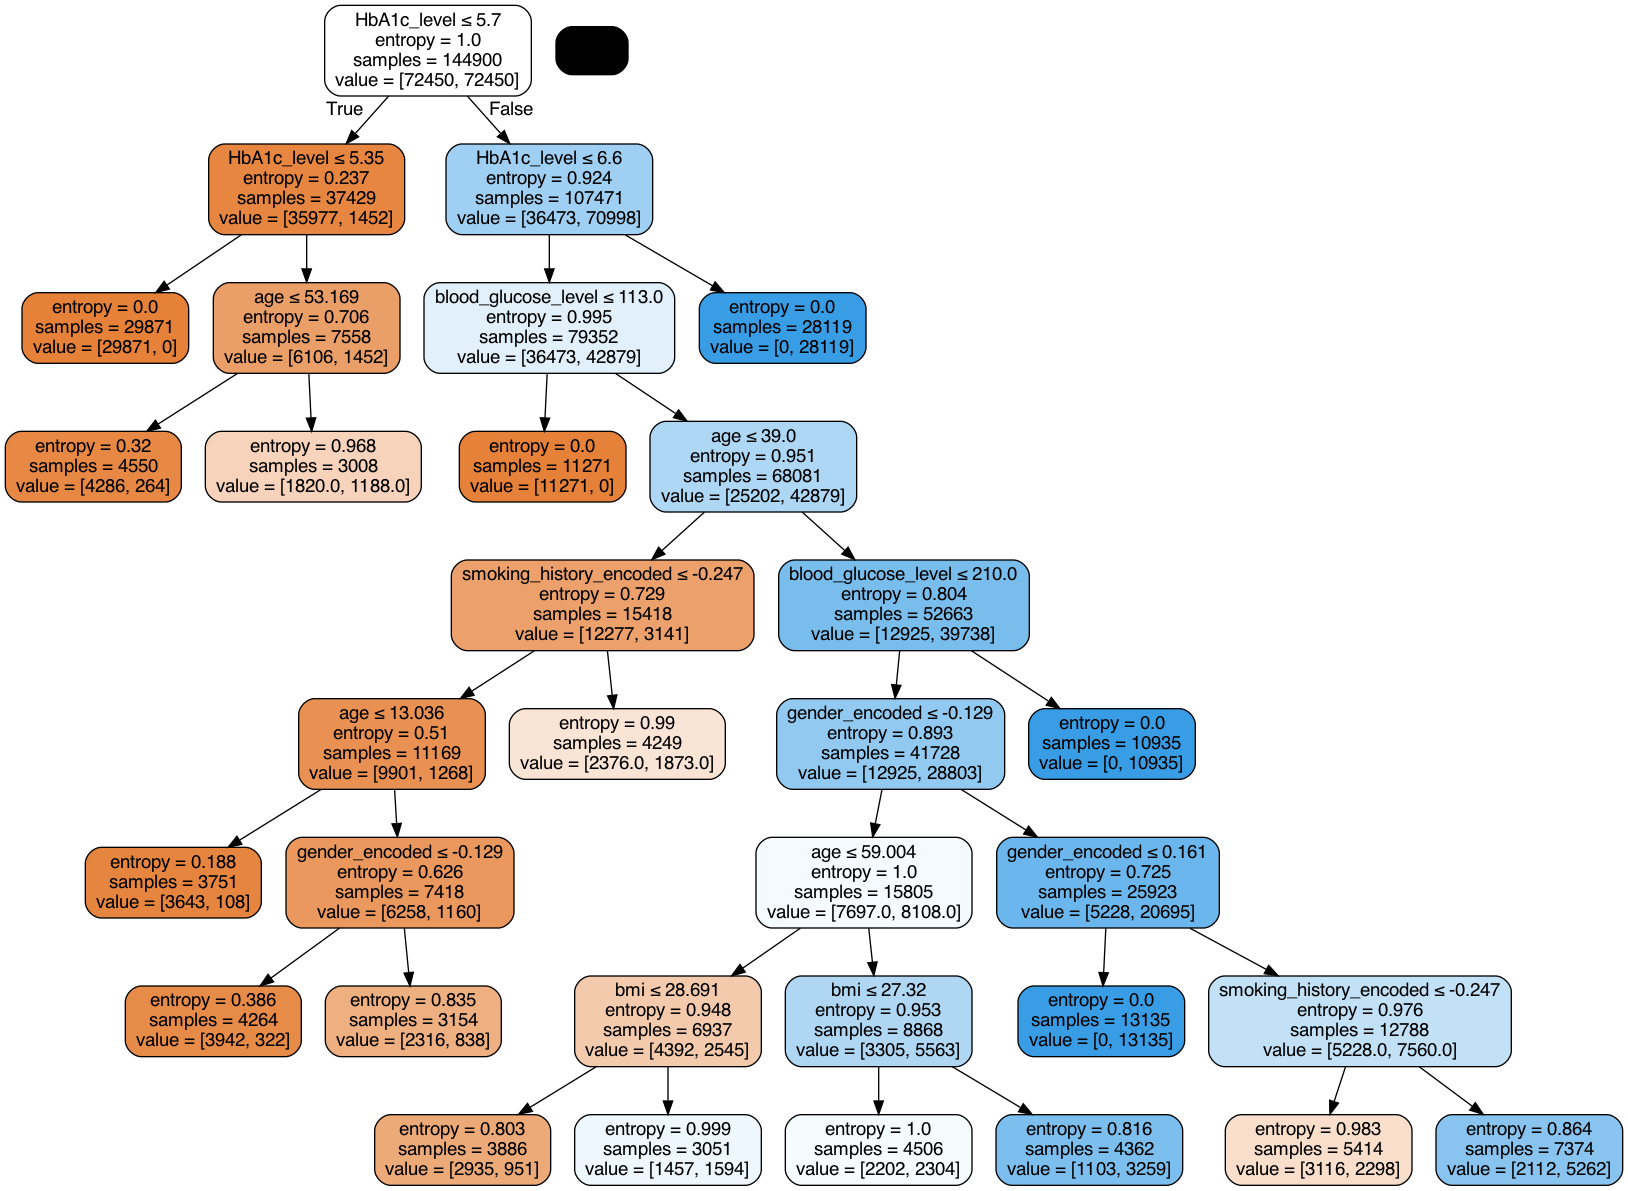

In [130]:
dot_data = StringIO()
export_graphviz(best_model, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [131]:
# check validation curve for over & under fitting
from sklearn.model_selection import validation_curve


# Decision Tree with outliers

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=42)

In [133]:
# Create copies of df
new_df_w_outliers_copy = df_outliers.copy()


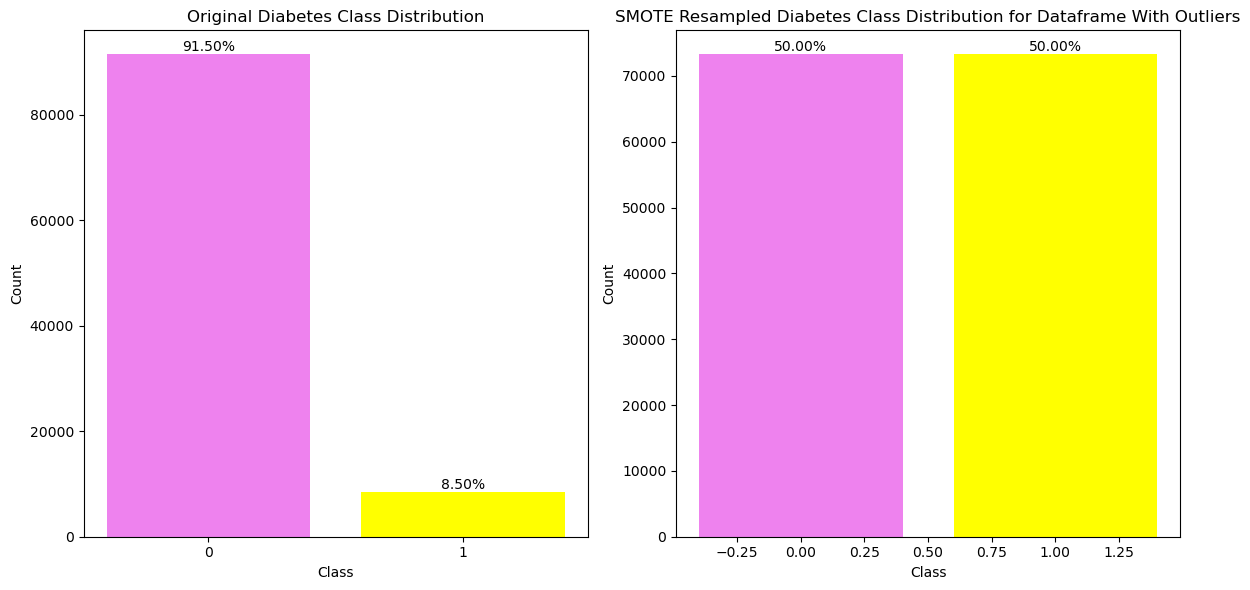

In [134]:

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count the occurrences of each class in the original dataset
original_class_counts = new_df_w_outliers_copy["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(new_df_w_outliers_copy) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_train).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_train) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe With Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [135]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

# train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.6666666666666666, 0.9, 'HbA1c_level <= 1.002\nentropy = 1.0\nsamples = 146520\nvalue = [73260, 73260]'),
 Text(0.5, 0.7, 'blood_glucose_level <= 1.522\nentropy = 0.924\nsamples = 110773\nvalue = [73260, 37513]'),
 Text(0.3333333333333333, 0.5, 'HbA1c_level <= -0.166\nentropy = 0.787\nsamples = 95780\nvalue = [73260, 22520]'),
 Text(0.16666666666666666, 0.3, 'entropy = 0.0\nsamples = 30282\nvalue = [30282, 0]'),
 Text(0.5, 0.3, 'blood_glucose_level <= -0.616\nentropy = 0.928\nsamples = 65498\nvalue = [42978, 22520]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 13277\nvalue = [13277, 0]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.986\nsamples = 52221\nvalue = [29701.0, 22520.0]'),
 Text(0.6666666666666666, 0.5, 'entropy = 0.0\nsamples = 14993\nvalue = [0, 14993]'),
 Text(0.8333333333333334, 0.7, 'entropy = 0.0\nsamples = 35747\nvalue = [0, 35747]')]

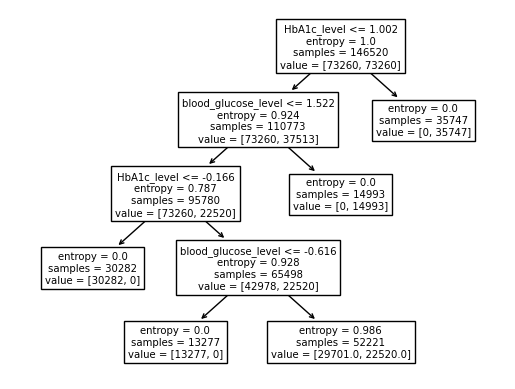

In [136]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X_outliers.columns.tolist())

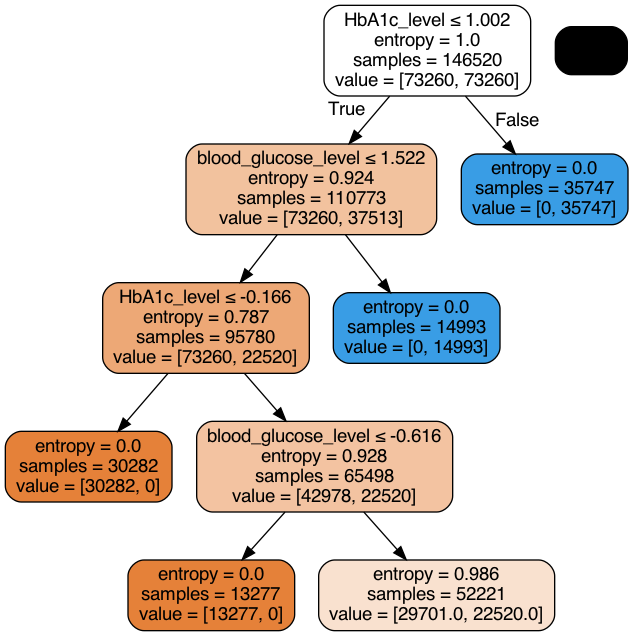

In [137]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Individuals with bmi less than 46.5 are diabetic...

In [138]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
26591,0,0
71711,0,0
64031,0,0
19801,0,0
81014,1,1
66338,0,0
42480,0,0
32409,0,0
90061,0,0
43693,0,0


In [139]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[18222,   583],
       [    0,  1192]])

In [140]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))
#dtree.score(X_test, y_test)

Accuracy: 0.9708456268440266

Precision: 1.0

Recall: 0.6715492957746478

F1 score: 0.80350522413212


<h3>Hyperparameter Tuning</h3>

In [141]:
# Faster at around 16secs
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [50,100,150,200,250],
    'min_samples_leaf': [50,100,150,200,250],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
predictions = best_model.predict(X_train)

evaluate_model(best_model)
print('Best Parameters:',grid_search.best_params_,end='\n\n')

Train Accuracy : 0.9091318591318591

Precision: 0.873523254075071

Recall: 0.9567977067977068

F1 score: 0.9132661038148843
Train Confusion Matrix:
[[63111 10149]
 [ 3165 70095]]
--------------------------------------------------
Test Accuracy : 0.8678301745261789

Precision: 0.39537126325940214

Recall: 0.923943661971831

F1 score: 0.5537734256289043
Test Confusion Matrix:
[[15714  2508]
 [  135  1640]]
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 50}



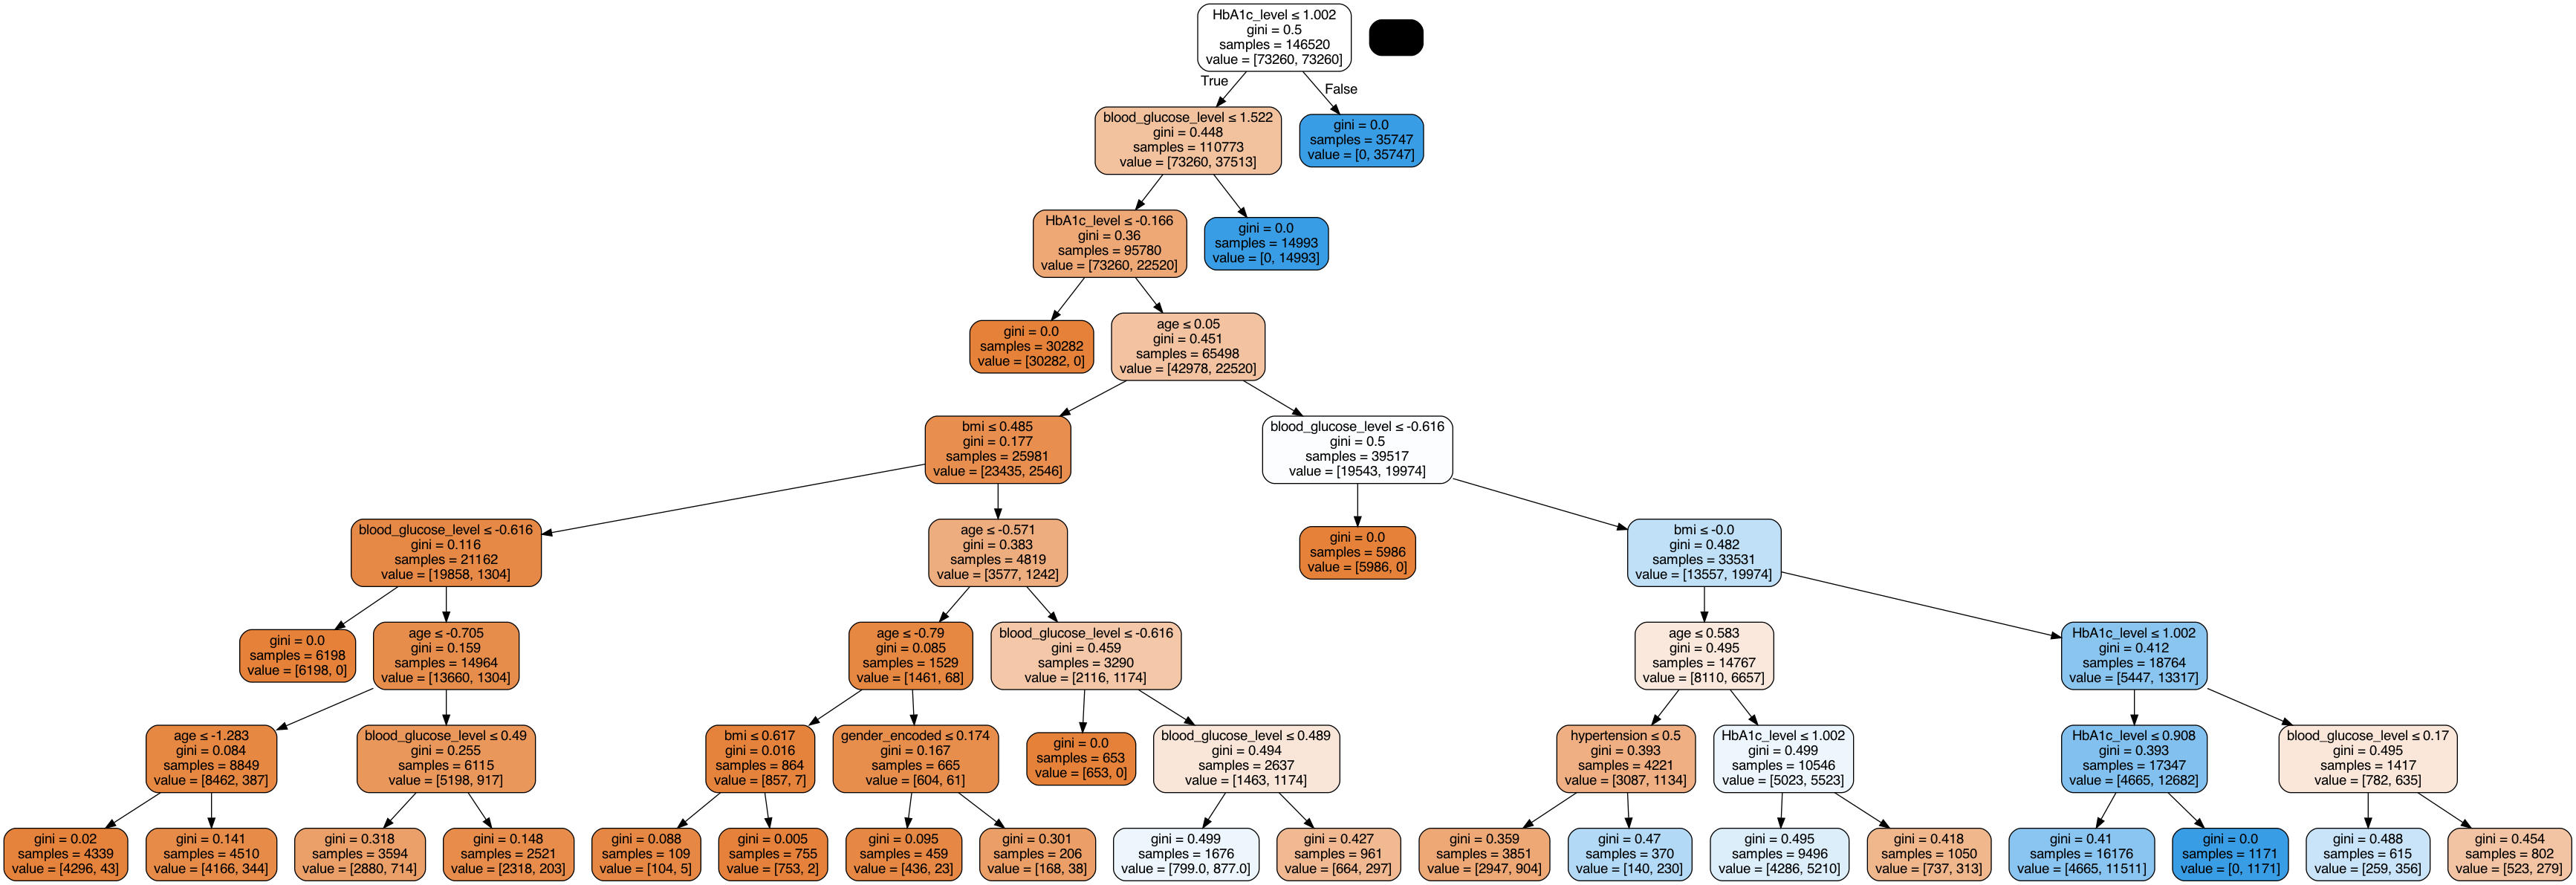

In [142]:
dot_data = StringIO()
export_graphviz(best_model, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())